## Impact of various parameters on behavior of gradient descent algorithm

In [2]:
from autograd import grad 
from autograd import numpy as np
from autograd import value_and_grad 
import matplotlib.pyplot as plt
import seaborn as sns
import utils

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True 

In [3]:
a1 = 0
b1 = np.sin(10)*np.ones((2,1))
C1 = np.array([[0.5,1],[0,9.75]])
g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

w = np.array([10.0,1.0]) # 2D initialization point
weight_1 = np.linspace(-1,10,100)
weight_2 = np.linspace(-1,1,100)


#### Data
- x and y axis show the weights and contour surface shows the value of cost function.
- Convex function we are trying to minimize: g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

#### Variation of learning rate

Plot 1 for alpha = 0.01


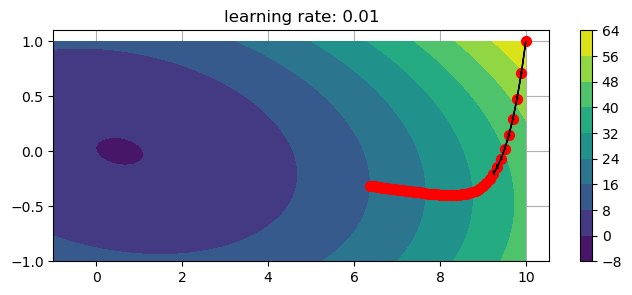

Plot 2 for alpha = 0.05


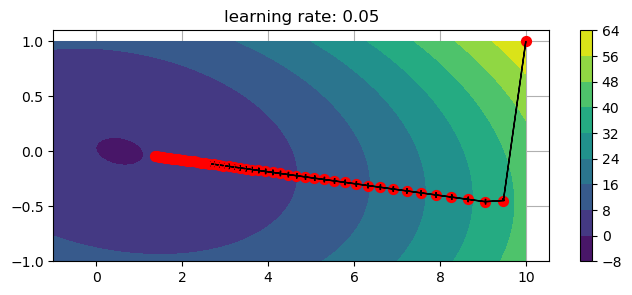

Plot 3 for alpha = 0.1


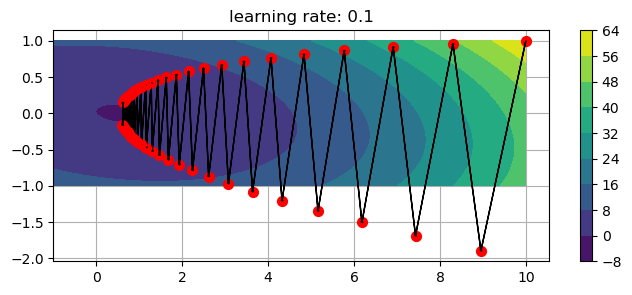

Plot 4 for alpha = 0.5


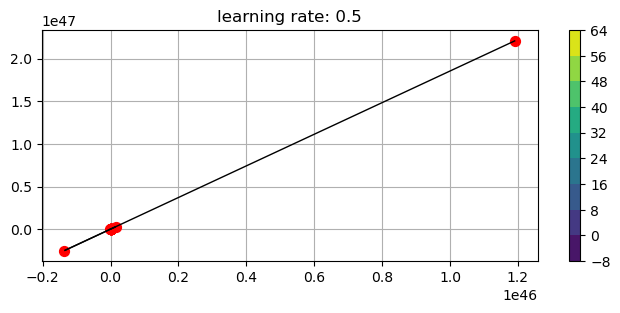

Plot 5 for alpha = 1


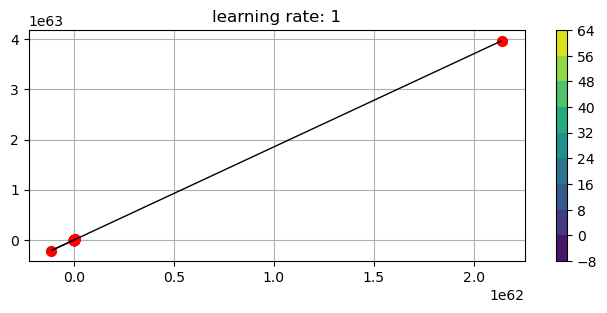

In [4]:
alpha = [10**(-2), 0.05,  10**(-1), 0.5, 10**(0)]
max_its = 50
i = 1

for alpha_choice in alpha:
    print(f'Plot {i} for alpha = {alpha_choice}')
    weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)
    i = i+1
    plt.show()

## Observations:
1. Plot:1-If the learning rate is low the gradient descent takes a long time to reach the minimum <br>

2. Plot:3- As the learning rate is increasing we see zig-zag behavior of gradient descent 
    - zig-zag behavior slows learning down as it takes longer to reach the minimum. 
    - Plot-4: Learning rate of 1 is so high that GD completely diverges leading to very high cost function values as seen on y axis  <br>

#### Variation of # of iterations

Plot 6 for # of iterations = 50


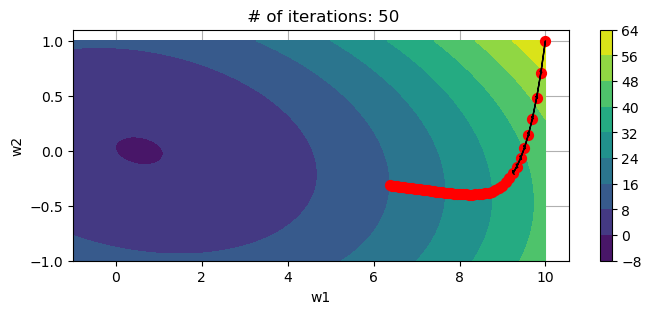

Plot 7 for # of iterations = 100


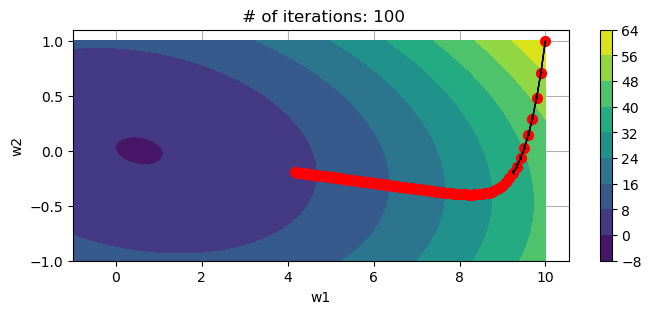

Plot 8 for # of iterations = 500


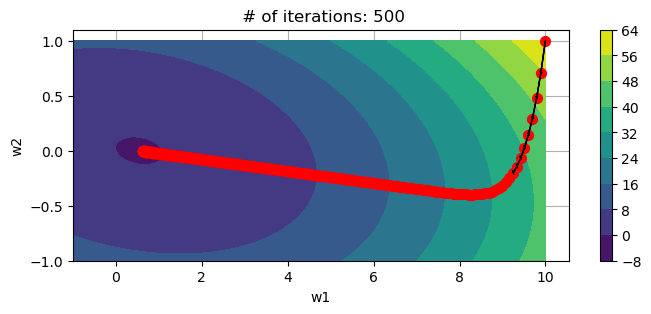

Plot 9 for # of iterations = 1000


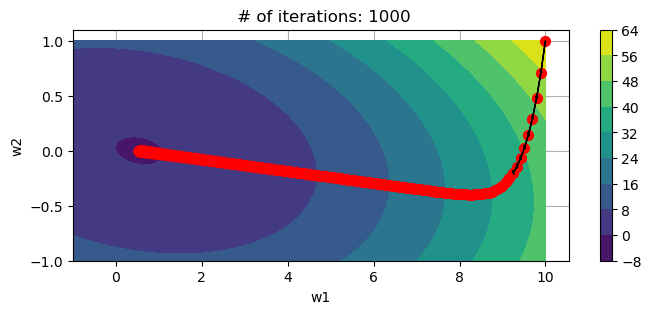

In [9]:
max_its = 50
max_its_arr = [50,100,500,1000]

alpha_choice = 0.01
for max_its in max_its_arr:
    weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    print(f'Plot {i} for # of iterations = {max_its}')
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)
    plt.title(f' # of iterations: {max_its}')
    plt.xlabel('w1')
    plt.ylabel('w2')
    i = i+1
    plt.show()

## Observations
- For a given learning rate as the # of iteration increase the gradient descent converges to the minimum value of the function.
- For Plot 6 # of iterations are not enough to reach the minimum. As we increase # of iterations for the same function the plot converges. 


## Plotting cost function

(100, 2)
(100,)


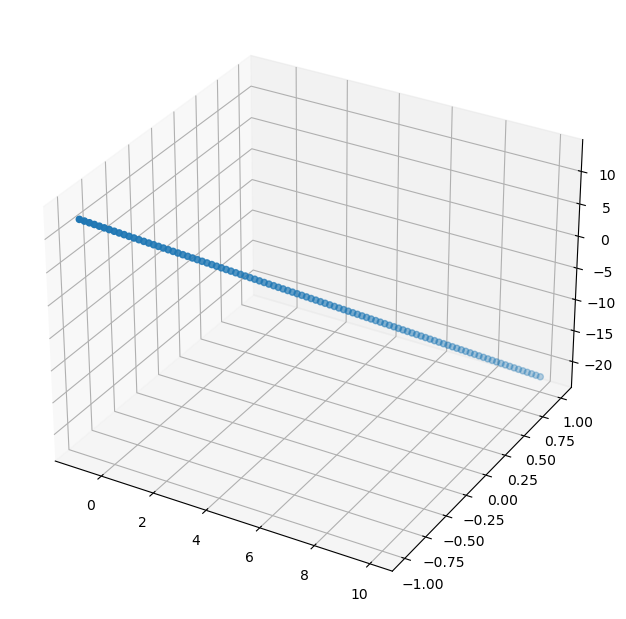

In [6]:
w_mat = np.array([weight_1, weight_2]).T
gTemp = g(w_mat.T)
print(w_mat.shape)
print(gTemp.shape)

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
sc = ax.scatter(weight_1, weight_2, gTemp, marker='o')

## Plotting surface of cost function

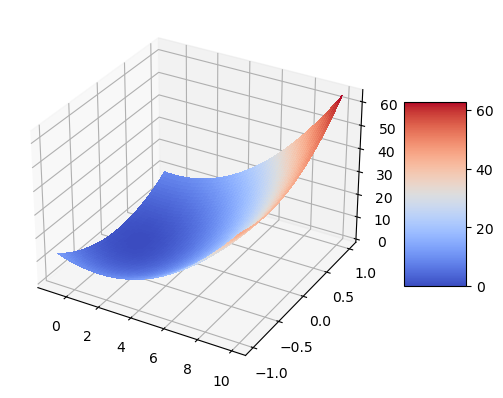

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(w1_vals, w2_vals, func_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=3)

#### References
- Machine Learning Refined, 2nd Edition, Jeremy Watt, Reza Borhani, Aggelos K. Katsaggelos.